# Multiclass Logistic Basics

Write a function to compute the ({multiclass}) logistic loss ({also called the cross-entropy loss}) given the parameters $(W,b)$ of a linear model (as numpy arrays) and an example $(x,y)$.

Add an $\ell_1$ regularization and an $\ell_2$ regularization to the loss function.

In [167]:
import numpy as np

P = 50 # no. of points taken per class
dim = 2 
C = 3 # no. of classes should be multiclass, ie more than 2
X = np.zeros((P*C,dim)) # Matrix X represents P*C with features dim (one row = one example)
y = np.zeros(P*C, dtype='uint8') # Vector y represents P*C belongs to class C.
for k in range(C):
    i = range(P*k,P*(k+1))
    theta = np.linspace(k*4,(k+1)*4,P) + np.random.randn(P)*0.2 
    X[i] = np.c_[np.linspace(0.0,1,P)*np.sin(theta), np.linspace(0.0,1,P)*np.cos(theta)]
    y[i] = k
    
#Parameters given in the question

W = 0.01 * np.random.randn(dim,C)
b = np.zeros((1,C))

#inserting the inputs as x value = X, y value = y
def l2_loss(x_value, y_value, w, b):
    regularization = 10**-3
    probability = np.exp(np.dot(x_value, w) + b) / np.sum(np.exp(np.dot(x_value, w) + b), axis=1, keepdims=True)
    log_probs = -np.log(probability[range(x_value.shape[0]),y_value])
    loss_data = np.sum(log_probs)/x_value.shape[0]
    regularization_loss = 0.5*regularization*np.sum(w**2) #least square error
    return loss_data + regularization_loss

def l1_loss(x_value, y_value, w, b):
    regularization = 10**-3
    probability = np.exp(np.dot(x_value, w) + b) / np.sum(np.exp(np.dot(x_value, w) + b), axis=1, keepdims=True)
    log_probs = -np.log(probability[range(x_value.shape[0]),y_value])
    loss_data = np.sum(log_probs)/x_value.shape[0]
    regularization_loss = 0.5*regularization*np.sum(np.sum(np.absolute(w))) # Least absolute deviation
    return loss_data + regularization_loss

print(l1_loss(X,y,W,b))
print(l2_loss(X,y,W,b))

1.0974374816568788
1.0974194520365832


# Classification Pipeline

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle

In [182]:
#Fn for split data as per given split percent
def datasplit(x, y,split_per):
    testCount = int((x.shape[0] * split_per) / 100)
    index_list = list(np.random.permutation(np.arange(0,x.shape[0]))[:x.shape[0]])
    train_data , test_data = x[index_list[0:testCount]] , x[index_list[testCount : x.shape[0]]]  
    train_class , test_class = y[index_list[0:testCount]] , y[index_list[testCount : x.shape[0]]]  
    return train_data, test_data, train_class, test_class

In [183]:
# Fn for training the model
def train(data, y_class, reg, learning_rate, gdIter):
    dim = data.shape[1] #Number of features
    num_class = max(y_class)+1
    #initalize weights and bias to zero
    weight , bias = np.zeros((dim,num_class)) , np.zeros((1,num_class))    

    # Initial values from hyperparameter
    num_examples = data.shape[0]
    for i in range(gdIter):    
        # evaluate class scores, [N x K]
        scores = np.dot(data, weight) + bias
        # calculating the class probabalities here
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
        # computing loss viz. avg cross-entropy loss and regularization
        correct_logprobs = -np.log(probs[range(num_examples),y_class])
        data_loss = np.sum(correct_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(weight*weight)
        loss = data_loss + reg_loss
        # calculating the gradient on scores
        dscores = probs
        dscores[range(num_examples),y_class] -= 1
        dscores /= num_examples
        # backpropate the gradient to the parameters (W,b)
        dW = np.dot(data.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)
        dW += reg*weight # regularization gradient
        # perform a parameter update
        weight += -learning_rate * dW
        bias += -learning_rate * db
    return weight, bias, loss
    #training function end

In [184]:
#fn for cross validation
def cross_validation(num_folds, x, y, regParm):
    cv_loss = []
    index_list = list(np.random.permutation(np.arange(0,x.shape[0]))[:x.shape[0]])
    index_split = np.array_split(index_list,num_folds)

    for i in range(num_folds):
        test_data = X[index_split[i]]
        test_class = y[index_split[i]]    
        if i==0 :
            result = np.concatenate ((index_split[i+1:]))
        elif i==num_folds-1 :
             result = np.concatenate ((index_split[0:i]))
        else:
            a = np.concatenate ((index_split[0:i]))
            b = np.concatenate ((index_split[i+1:]))
            result = np.concatenate((a,b))
    training_data = x[result]
    training_class = y[result]    
    l_weight, l_bias, l_loss = train(training_data, training_class, regParm, 1e-0, 200)
    scores_testData = np.dot(testing_data, l_weight) + l_bias
    predicted_class = np.argmax(scores_testData, axis=1)
    loss_val_temp = np.mean(predicted_class == testing_class)
    cv_loss.append(loss_val_temp)
    return(sum(cv_loss)/len(cv_loss))

Test Data Accuracy:  0.5166666666666667
Train Data Accuracy:  0.575


<BarContainer object of 2 artists>

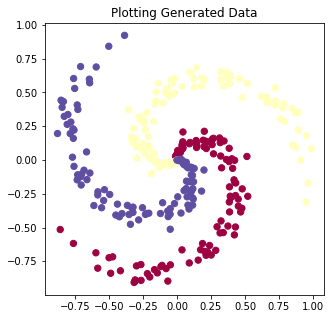

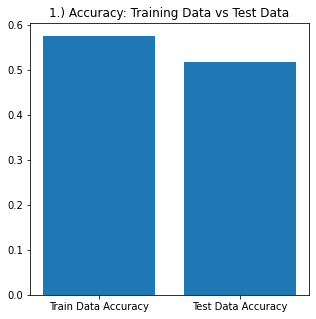

In [185]:
#Q4 Part A: Generate Data 
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    np.random.seed(30)
    r = np.linspace(0.0,1,N) # radius
    np.random.seed(20)
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

#Plotting the data 
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 5.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'YlGn_r'
#Plot the data
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.title('Plotting Generated Data')


# Q4 Part B: splitting the data here
training_data, testing_data, training_class, testing_class = datasplit(X, y, 80)

#train model
l_weight, l_bias, l_loss = train(training_data, training_class, 1e-3, 1e-0, 200)

# Run model on the test data
scores_testData = np.dot(testing_data, l_weight) + l_bias
predicted_class_testdata = np.argmax(scores_testData, axis=1)
accuracy_testdata = np.mean(predicted_class_testdata == testing_class)
print("Test Data Accuracy: ", accuracy_testdata)

# apply model on the training data
scores_trainData = np.dot(training_data, l_weight) + l_bias
trainingdata_pred = np.argmax(scores_trainData, axis=1)
accuracy_traindata = np.mean(trainingdata_pred == training_class)
print("Train Data Accuracy: ", accuracy_traindata)

#1 plot comparison of error training vs test error
fig = plt.figure()
plt.title('1.) Accuracy: Training Data vs Test Data')
item = ['Train Data Accuracy', 'Test Data Accuracy']
values = [accuracy_traindata, accuracy_testdata]
plt.bar(item, values)

Q4 C) Here, We observe the test data accuracy higher than the train data accuracy. This occurs when our data model is overfit. We can observe that model performs better on the unseen data compared to that of the seen data

Cross Validation Accuracy:  0.5333333333333333


<BarContainer object of 2 artists>

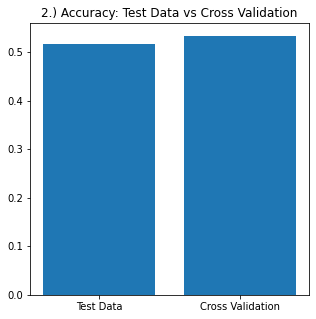

In [186]:
#2 plot comparison of error test vs cross validated result
cv_accuracy = cross_validation(5, X, y, 1e-3)
print("Cross Validation Accuracy: ", cv_accuracy)
fig = plt.figure()
plt.title('2.) Accuracy: Test Data vs Cross Validation')
item = ['Test Data', 'Cross Validation']
values = [accuracy_testdata, cv_accuracy]
plt.bar(item, values)

Q4 D) Contrasting to the above graph here we can the expected behavior of our data model, we observe that with cross validation the accuracy of the model increases overall and its because during cross validation each fold of the data undergoes both training and testing phase iteratively. Hence the model is trained better and is expected to perform better.

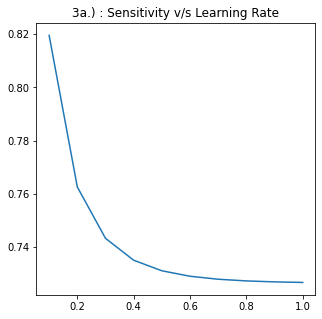

In [187]:
#3 Sensitivity to learning rate
learning_rate_error = []
for i in np.linspace(0.1, 1, 10):
    l_weight, l_bias, l_loss = train(training_data, training_class, 1e-3, i, 200)
    learning_rate_error.append(l_loss)
#(.00001, 1, 10)
#Plot the data
fig = plt.figure()
plt.title('3a.) : Sensitivity v/s Learning Rate')
plt.plot(np.linspace(0.1, 1, 10), learning_rate_error)

As the learning rate or step size increase we observe a the sensitive or true postive rate decrease. This indicates the model does not perform well in correctly predicting the classes.

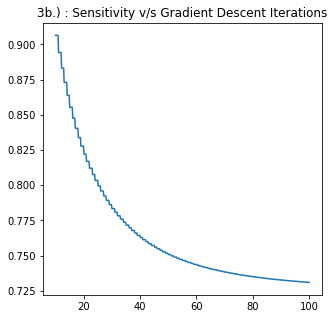

In [188]:
#4 Sensitivity to Gradient Descent Iterations
grad_desc_error = []
for i in np.linspace(10, 100, 500):
    l_weight, l_bias, l_loss = train(training_data, training_class, 1e-3, 1e-0, int(i))
    grad_desc_error.append(l_loss)

#Plot the data
fig = plt.figure()
plt.title('3b.) : Sensitivity v/s Gradient Descent Iterations')
plt.plot(np.linspace(10, 100, 500), grad_desc_error)

C:\Users\TV\AppData\Local\Temp/ipykernel_36144/917360184.py:14: RuntimeWarning: overflow encountered in exp
  exp_scores = np.exp(scores)
C:\Users\TV\AppData\Local\Temp/ipykernel_36144/917360184.py:15: RuntimeWarning: invalid value encountered in true_divide
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
C:\Users\TV\AppData\Local\Temp/ipykernel_36144/917360184.py:17: RuntimeWarning: divide by zero encountered in log
  correct_logprobs = -np.log(probs[range(num_examples),y_class])


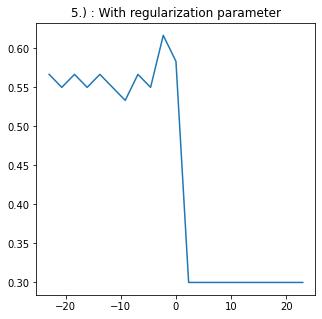

In [189]:
#5 Searching best regularization parameter
regularization_error=[]
for i in np.logspace(-10.0, 10.0, num=21):
    regularization_error.append(cross_validation(5, X, y, i))
#Plot the data
fig = plt.figure()
plt.title('5.) : With regularization parameter')
plt.plot(np.log(np.logspace(-10.0, 10.0, num=21)), regularization_error)

c:\users\tv\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\tv\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


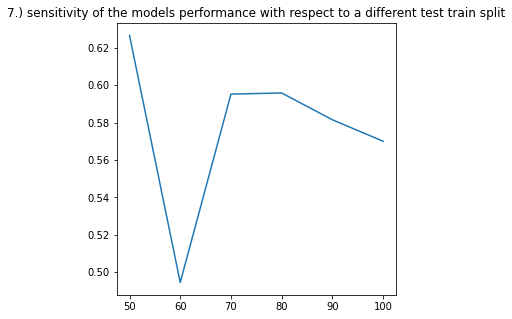

In [190]:
#7 sensitivity by train test split, error on test result accuracy
split_data_error=[]
for i in np.linspace(50, 100, num=6):
  # splitting the data into train and test
    training_data, testing_data, training_class, testing_class = datasplit(X, y, int(i))

  #training the model
    l_weight, l_bias, l_loss = train(training_data, training_class, 1e-3, 1e-0, 200)
  # apply on test data
    scores_testData = np.dot(testing_data, l_weight) + l_bias
    predicted_class_testdata = np.argmax(scores_testData, axis=1)
    accuracy_testdata = np.mean(predicted_class_testdata == testing_class)
  # applying on test data
    scores_trainData = np.dot(training_data, l_weight) + l_bias
    trainingdata_pred = np.argmax(scores_trainData, axis=1)
    split_data_error.append(np.mean(trainingdata_pred == training_class))

#Plotting data
fig = plt.figure()
plt.title('7.) sensitivity of the models performance with respect to a different test train split')
plt.plot(np.linspace(50, 100, num=6), split_data_error)